In [3]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

<font size = 4> Initial Conditions 1 </font>

In [4]:
def sum_f(x):
  y = np.cos(2*np.pi*x)
  for j in range(2,24):
    y = y + (np.cos(2*mt.pi*j*x)/j)
  return y

<font size = 5> Finite Difference Code for one-dimensional space</font>

<font size = 5> Periodic boundary conditions </font>

In [30]:
class Schnakenberg:
    def __init__(self,a,b,gamma,d,L,P,dt,T):
        self.a = a
        self.b = b
        self.gamma = gamma
        self.d = d
        self.L = L
        self.P = P
        self.dt = dt
        self.T = T

    def parameters(self):
        dx = self.L/self.P
        N = mt.floor(self.T/self.dt)
        u0 = self.a+self.b
        v0 = self.b/((self.a+self.b)**2)
        lambd = (self.dt)/(dx**2)
        x = np.arange(0,self.L+0.1,dx)
        t = np.arange(0,N,1)
        
        x = np.append(x,1)
        x = np.append(x,1)
        x = np.append(x,1)

        return self.a,self.b,self.gamma,self.d,self.L,self.P,self.dt,self.T,dx,N,u0,v0,lambd,x,t
        
    def mesh_creation(self):
        #Morphogen u
        mesh_u = np.zeros([len(t),len(x)])
        #Morphogen v
        mesh_v = np.zeros([len(t),len(x)])   
        
        #Initial conditions building:
        mesh_u[:][:] = u0 + 0.001 * (sum_f(x))
        
        mesh_v[:][:] = v0 + 0.001 * (sum_f(x))
   
        return mesh_u,mesh_v
        
    @staticmethod
    @jit(nopython=True)
    def finite_difference(mesh_u, mesh_v, a, b, d, lambd, dx, N, x, gamma):
        for i in range(1,N):#time N (iterations i)
            
            #Periodic boundary conditions
            
            #U_mesh
            mesh_u[:,0] = mesh_u[:,len(x)-3]
            mesh_u[:,len(x)-3] = mesh_u[:,0]
    
            #V_mesh
            mesh_v[:,0] = mesh_v[:,len(x)-3]
            mesh_v[:,len(x)-3] = mesh_v[:,0]
    
            for j in range(1,len(x)-2): #j = columna eje x espacial en u
              mesh_u[i][j] = mesh_u[i-1][j] + lambd*((dx**2)*gamma*(a - mesh_u[i-1][j] + ((mesh_u[i-1][j])**2 * mesh_v[i-1][j])) + mesh_u[i-1][j+1]+ -2*mesh_u[i-1][j] + mesh_u[i-1][j-1])
    
            for j in range(1,len(x)-2): #j = columna eje x espacial en v
              mesh_v[i][j] = mesh_v[i-1][j] + d*lambd*((((dx**2)*gamma*(b - ((mesh_u[i-1][j])**2 * mesh_v[i-1][j])))/(d)) + mesh_v[i-1][j+1]+ -2*mesh_v[i-1][j] + mesh_v[i-1][j-1])
                
        return mesh_u, mesh_v

<font size = 5> Plotting </font>

In [37]:
def Plot(mesh_u,x,morphogen):
    x_ = np.arange(0, (len(x) - 1) + 0.1, 1)
    x = x_ / 68
    y = [50, 200, 500, 1000, 3000, 5000]
    fig, ax = plt.subplots(figsize=(10, 6), ncols=3, nrows=2)
    fig.suptitle(f"Schnakenberg 1D, morphogen {morphogen}")
    current_ax = 0
    for i in y:
        ax = fig.axes[current_ax]
        ax.plot(x, mesh_u[i])
        current_ax += 1
    plt.show()

<font size = 5> Run class Schnakenberg </font>

In [31]:
#I choose the parameters a,b,d from the turing space and the time dt = 1e-5 from the stability condition for finite difference diffusion problems
schnakenberg_model = Schnakenberg(0.126779, 0.792366, 10000, 10, 1, 60, 1e-5, 0.5)
a, b, gamma, d, L, P, dt, T, dx, N, u0, v0, lambd, x, t = schnakenberg_model.parameters()

# Create the meshes
mesh_u, mesh_v = schnakenberg_model.mesh_creation()

#Run the finite difference
mesh_u, mesh_v = schnakenberg_model.finite_difference(mesh_u, mesh_v, a, b, d, lambd, dx, N, x, gamma)


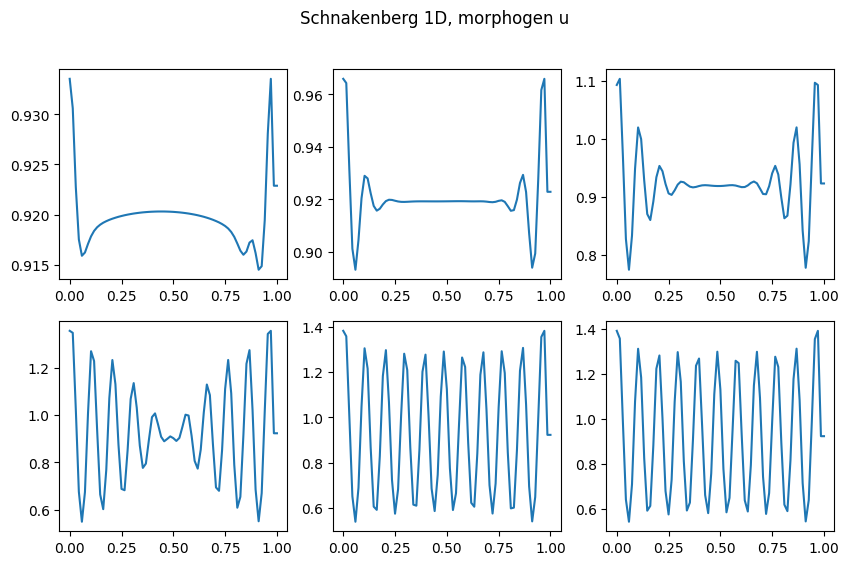

In [39]:
#Plot the results morphogen u
Plot(mesh_u,x,"u")

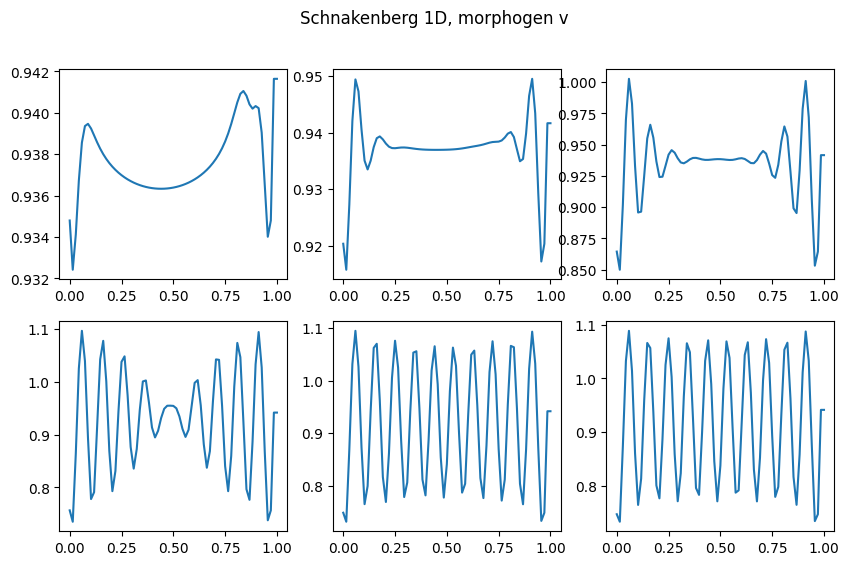

In [40]:
#Plot the results morphogen v
Plot(mesh_v,x,"v")

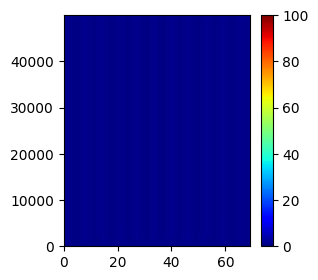

In [41]:
#All plots in time t = 0.5/1e-5 = 50,000 morphogen u
plt.figure(figsize = (3,3))
plt.pcolormesh(mesh_u, cmap=plt.cm.jet, vmin=0, vmax=100)
plt.colorbar()
plt.show()